In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
#load libraries
import pandas as pd  #linear algebra
import numpy as np  #data processing, CSV file I/O (e.g. pd.read_cvs)
from scipy.stats import norm
import seaborn as sns #visualization

plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.titlesize'] = 'large'

In [75]:
#Read the file "data.cvs" and print the contents
data = pd.read_csv('Machine.csv', index_col = False)

In [76]:
data.head(27)

,Unnamed: 0,Age,sex,edu_years,Rey_CFT_copy_score,Rey_CFT_copy_score.1,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_MMSE_drawing_p,CDR,Sum_of_boxes
0,0,75,0,14.0,17,17,1,1,1,2.44≤,1.0,8.0
1,1,85,1,11.0,18,18,1,1,1,7.51≤,1.0,6.0
2,2,80,0,12.0,19,19,1,1,1,5.53≤,0.5,1.5
3,3,75,0,6.0,20,20,1,1,0,<17.46,0.5,2.5
4,4,73,0,12.0,21,21,1,1,1,3.31≤,0.5,2.5
5,5,63,0,13.0,22,22,1,1,1,1.31≤,0.5,1.5
6,6,82,1,2.0,23,23,1,1,1,49.56≤,0.5,1.5
7,7,77,0,0.5,24,24,1,0,0,<42.42,0.5,3.0
8,8,57,0,16.0,25,25,1,1,1,1.15≤,0.5,2.0
9,9,64,1,16.0,26,26,1,1,1,1.31≤,0.5,4.0


In [77]:
data.tail(5)

,Unnamed: 0,Age,sex,edu_years,Rey_CFT_copy_score,Rey_CFT_copy_score.1,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_MMSE_drawing_p,CDR,Sum_of_boxes
21,21,62,0,12.0,40,40,1,1,1,2.28≤,0.5,1.0
22,22,81,1,18.0,41,41,1,1,1,2.04≤,0.5,1.5
23,23,72,0,16.0,42,42,1,1,1,1.91≤,0.5,2.5
24,24,70,0,7.0,43,43,1,1,1,6.36≤,0.5,1.0
25,25,83,0,6.0,44,44,1,1,1,22≤,0.5,4.0


In [78]:
data.shape

(26, 12)

In [79]:
#Review data types with "info()"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       26 non-null     int64  
 1   Age                              26 non-null     int64  
 2   sex                              26 non-null     int64  
 3   edu_years                        26 non-null     float64
 4   Rey_CFT_copy_score               26 non-null     int64  
 5   Rey_CFT_copy_score.1             26 non-null     int64  
 6   Alternating_square_and_triangle  26 non-null     int64  
 7   Luria_loop                       26 non-null     int64  
 8   K_MMSE_drawing                   26 non-null     int64  
 9   K_MMSE_drawing_p                 26 non-null     object 
 10  CDR                              26 non-null     float64
 11  Sum_of_boxes                     26 non-null     float64
dtypes: float64(3), int64(8),

In [ ]:
# Review number of columns of each data type in a DataFrame:
data.get_dtype_counts()

In [80]:
#check for missing variables
data.isnull().any()

Unnamed: 0                         False
Age                                False
sex                                False
edu_years                          False
Rey_CFT_copy_score                 False
Rey_CFT_copy_score.1               False
Alternating_square_and_triangle    False
Luria_loop                         False
K_MMSE_drawing                     False
K_MMSE_drawing_p                   False
CDR                                False
Sum_of_boxes                       False
dtype: bool

In [81]:
data.Age.unique()

array([75, 85, 80, 73, 63, 82, 77, 57, 64, 90, 70, 87, 72, 69, 78, 89, 62,
       81, 83])

In [82]:
#it only fitches unique values from the listed data
data.sex.unique()

array([0, 1])

In [83]:
#save the cleaner version of dataframe for future analyis
data.to_csv('Machine.csv')

In [ ]:
#data.drop means unamed colums 
data.drop ('Unnamed: 0' , axis=1, inplace=True)

In [84]:
#basic descriptive statistics
data.describe()

,Unnamed: 0,Age,sex,edu_years,Rey_CFT_copy_score,Rey_CFT_copy_score.1,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,CDR,Sum_of_boxes
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,12.500000,74.769231,0.346154,9.980769,30.307692,30.307692,0.923077,0.961538,0.807692,0.692308,3.365385
std,7.648529,8.796853,0.485165,5.296189,8.474759,8.474759,0.271746,0.196116,0.401918,0.426073,2.995188
min,0.000000,57.000000,0.000000,0.500000,17.000000,17.000000,0.000000,0.000000,0.000000,0.500000,0.500000
25%,6.250000,70.000000,0.000000,6.000000,23.250000,23.250000,1.000000,1.000000,1.000000,0.500000,1.500000
50%,12.500000,75.000000,0.000000,11.500000,30.000000,30.000000,1.000000,1.000000,1.000000,0.500000,2.250000
75%,18.750000,81.750000,1.000000,15.500000,37.750000,37.750000,1.000000,1.000000,1.000000,0.500000,4.000000
max,25.000000,90.000000,1.000000,18.000000,44.000000,44.000000,1.000000,1.000000,1.000000,2.000000,12.000000


In [85]:
#If the data curve is shifted to the left or right, left means the data read more about it
data.skew() 

Unnamed: 0                         0.000000
Age                               -0.108746
sex                                0.687052
edu_years                         -0.163910
Rey_CFT_copy_score                 0.061926
Rey_CFT_copy_score.1               0.061926
Alternating_square_and_triangle   -3.373242
Luria_loop                        -5.099020
K_MMSE_drawing                    -1.658711
CDR                                2.491216
Sum_of_boxes                       1.798164
dtype: float64

In [86]:
#lets get the frequency of subjects age
sns.set_style ("white")
sns.set_context({"figure.figsize": (10,8)})
#sns.countplot(data['Age'],label='Count',palette="Set3")

In [87]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se,
# and __worst) to perform visualisation plots off. 
#Join the 'Age' and 'sex' back on
data_Age_diag = data.loc [:, ["Age", "sex", "edu_years", "Rey_CFT_copy_score", "Rey_CFT_copy_score.1", "K_MMSE_drawing_p", "CDR", "Sum_of_boxes"]]
data_sex = data.loc [:,["sex"]]

#For a merge + slice:
#data_mean = data.ix[:, 1:3]

#data_se=data.ix[:,11:22]
#data_worst=data.ix[:,23:]

#print(df_id_diag.columns)
#print(data_mean.columns)
#print(data_se.columns)
#print(data_worst.columns)

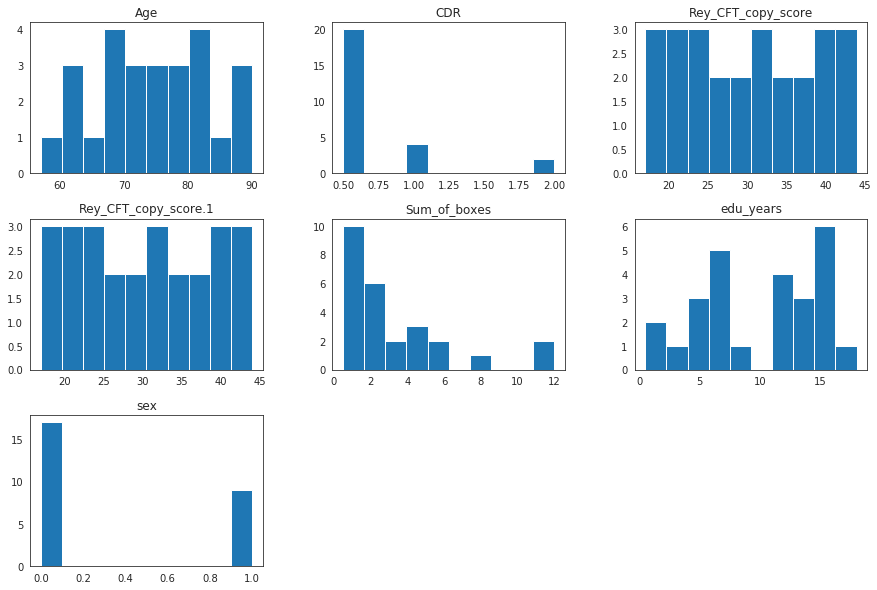

In [88]:
hist_mean=data_Age_diag.hist(bins=10, figsize=(15, 10),grid=False,)

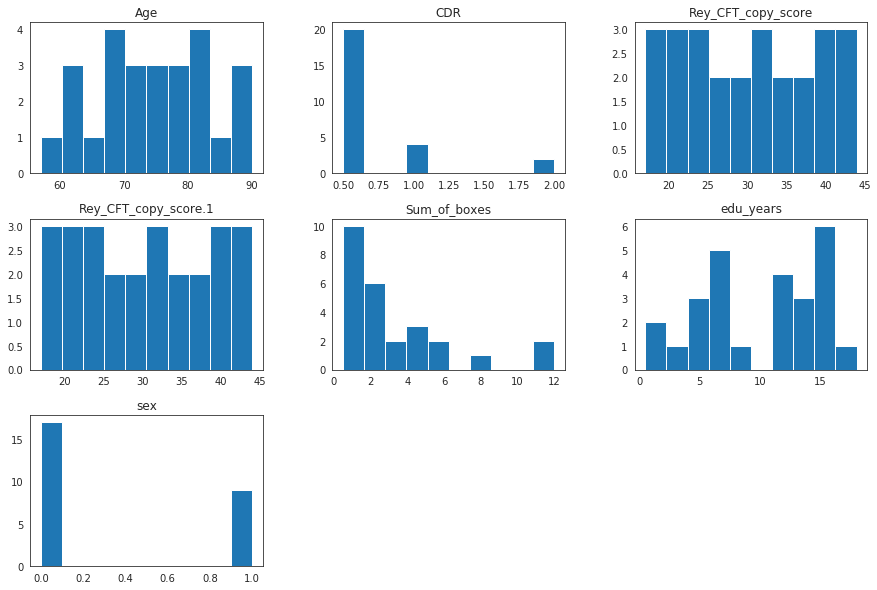

In [89]:
hist_se=data_Age_diag.hist(bins=10, figsize=(15, 10),grid=False,)

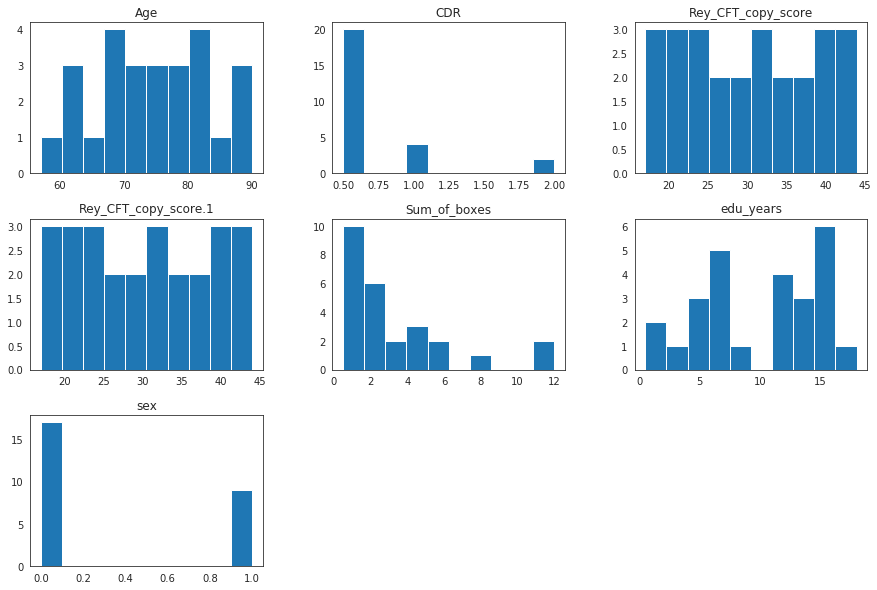

In [90]:
hist_worst=data_Age_diag.hist(bins=10, figsize=(15, 10),grid=False,)

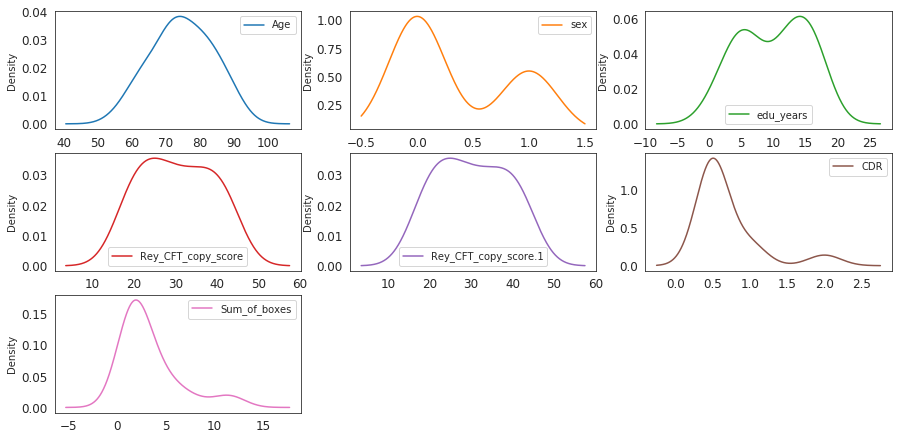

In [91]:
#Density Plots
plt = data_Age_diag.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

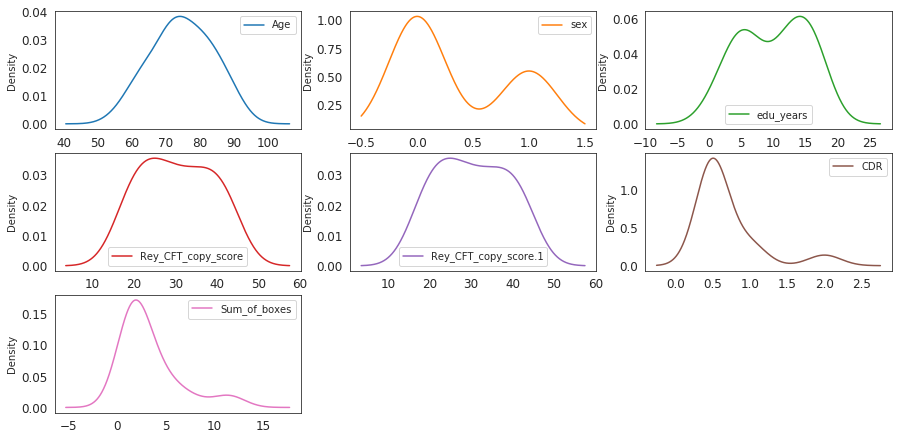

In [92]:
#Density Plots
plt_se = data_Age_diag.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

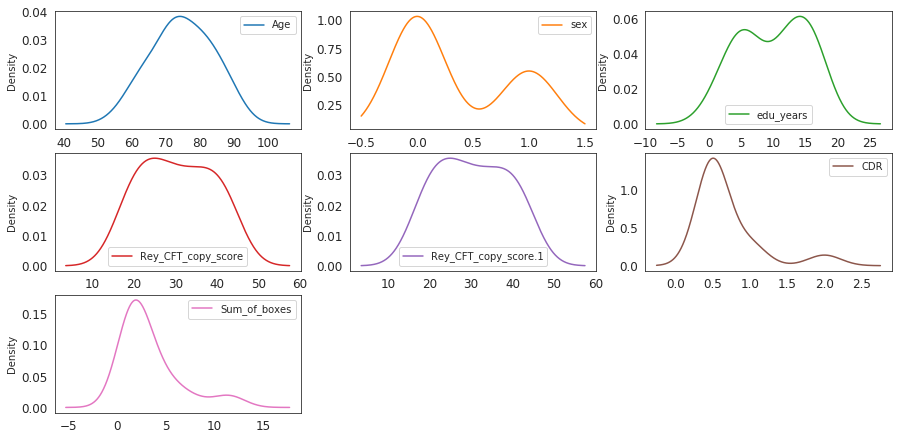

In [93]:
#Density Plots
plt_worst = data_Age_diag.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('Machine.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]],hue='Age' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)